# INFO 251: Final project

#### Members: Marius Brogaard Lerstein and Tuva Cornelia Oppenhagen

## Introduction

Bike sharing is a growing transportation method in many cities around the world, with over 500 rental programs with a total of over 500 thousand bikes, an important insight to the business is how many bikes are rented per day. With factors such as weather, weekend, temperature, wind information etc. affecting the number of rentals, this gives a good foundation for a machine learning classification problem. In our research project, we want to try out different classification algorithms to predict the amount of bikes that were rented in a given day. The models we want to try out include; logistic regression, Naive Bayes, K-Nearest Neighbors, Decision Trees, Random Forests.

The dataset we are going to use contains the count of rental bikes between 2011 and 2012 in Washington, DC including information about the weather conditions and season. We are going to use the dataset containing hourly information in order to get more data to use in order to train and test our model.

<b>Link to dataset:</b> https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset

As the different classification models require different data preprocessing, we want to split our work into finishing one model before starting on the next one. Therefore, we suggest these milestones for our deliverables:

<b>Before 04/15/2023</b>: 
Implement model for logistic regression, naive bayes, K-Nearest Neighbors, with the required preprocessing.

<b>Before 03/05/2023</b>: 
Implement the decision tree and random forest algorithms, with their required preprocessing. To conclude the results from all of our algorithms, our comparison between the accuracy values should also be described in this milestone.


## EDA, Data Cleaning and Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading data
data = pd.read_csv('data/hour.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
data.isnull().values.any()

False

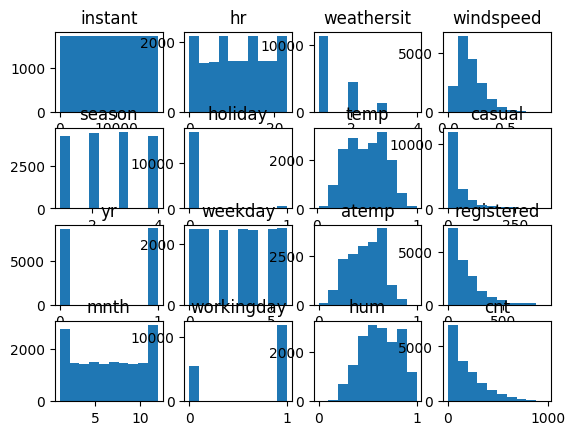

In [7]:
fig, axs = plt.subplots(4,4)
i = 0
j = 0
for column in data.loc[:, data.columns!='dteday'].columns:
    axs[i, j].hist(data[column])
    axs[i, j].set_title(column)
    if i==3:
        i = 0
        j += 1
    else:
        i+=1

In [8]:
data = data.drop(columns=['dteday', 'casual', 'registered'])

### Summary
- No missing values in the data
- Standardized the variables "temp", "windspeed", "atemp" and "hum" because they were normally distributed
- Removed "dteday" column because it was of type "object" which cannot be used in some of the claffification algorithms
- Removed "casual" and "registered" columns because we only want to predict the total number of users

## Method 1: Logistic Regression

Standardization function is copied from PS4:

In [9]:
import numpy as np

def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'cnt']
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LogisticRegression(max_iter=1000)
clf.fit(standardize(X_train), y_train)
score = clf.score(standardize(X_test), y_test)
print(score)

0.01812428078250863


## Method 2: Multiple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(standardize(X_train), y_train)
score = clf.score(standardize(X_test), y_test)
print(score)

# overfitting

0.3871702645688918


In [37]:
X = data[['season', 'holiday', 'workingday', 'temp', 'hr', 'weekday', 'atemp', 'weathersit', 'yr']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(standardize(X_train), y_train)
score = clf.score(standardize(X_test), y_test)
print(score)
X.head()

0.3441370038217484


,season,holiday,workingday,temp,hr,weekday,atemp,weathersit,yr
0,1,0,0,0.24,0,6,0.2879,1,0
1,1,0,0,0.22,1,6,0.2727,1,0
2,1,0,0,0.22,2,6,0.2727,1,0
3,1,0,0,0.24,3,6,0.2879,1,0
4,1,0,0,0.24,4,6,0.2879,1,0
